In [1]:
import matplotlib.pyplot as plt
import glob as g
import json

In [6]:
folder = "_originalTransitionRates"
fnames = g.glob("../" + folder + "//*.meta.json")

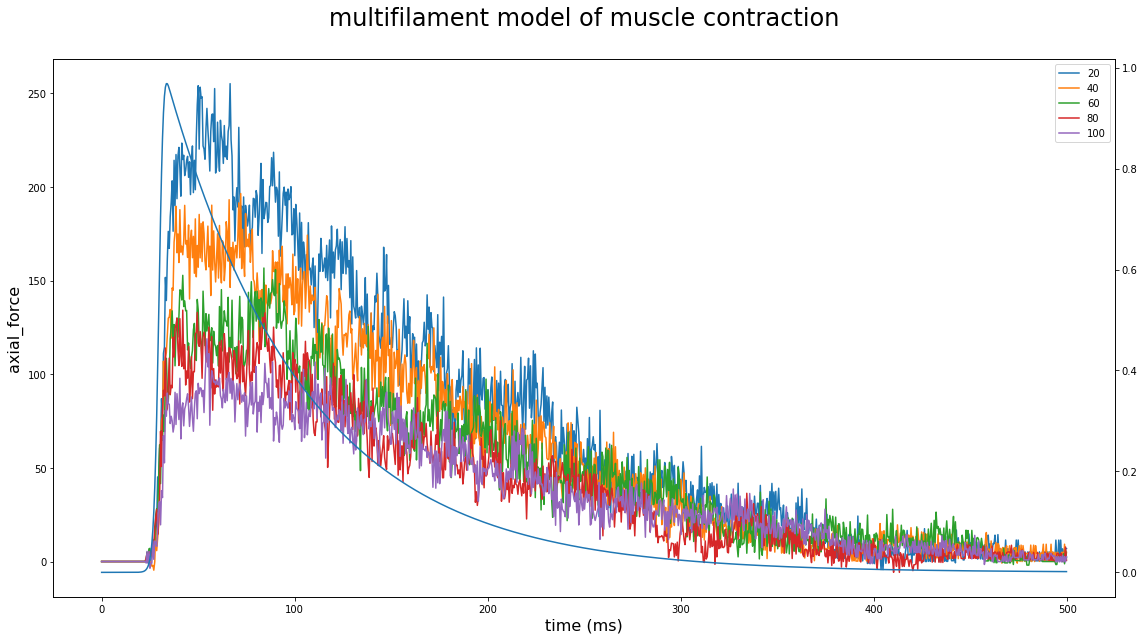

In [7]:
key = "axial_force"
fs = 16

fig, axes = plt.subplots(figsize=(16, 9))

ensemble = {}
for fname in fnames:
    try:
        with open(fname, 'r') as metafile:
            meta = json.load(metafile)
        data_fname = fname.split('.meta')[0] + '.data.json'
        with open(data_fname, 'r') as datafile:
            data = json.load(datafile)
        ensemble[float(meta['comment'])] = [meta, data]
    except FileNotFoundError:
        pass
    
for stiffness, files in sorted(ensemble.items()):   
    meta = files[0]
    data = files[1]
    
    time_trace = data['timestep'].copy()
    for i in range(len(time_trace)):
        time_trace[i] *= data['timestep_length']
    axes.plot(time_trace, data[key], label=meta['comment'])

plt.legend()

title = "multifilament model of muscle contraction\n"
plt.title(title, fontsize=fs*1.5)
plt.xlabel("time (ms)", fontsize=fs)
plt.ylabel(key, fontsize=fs)

ax2 = plt.twinx()
ax2.plot(time_trace, data['actin_permissiveness'])
    

plt.tight_layout()

In [4]:
fnames = g.glob("../_fixedTransitionRate//*.meta.json")

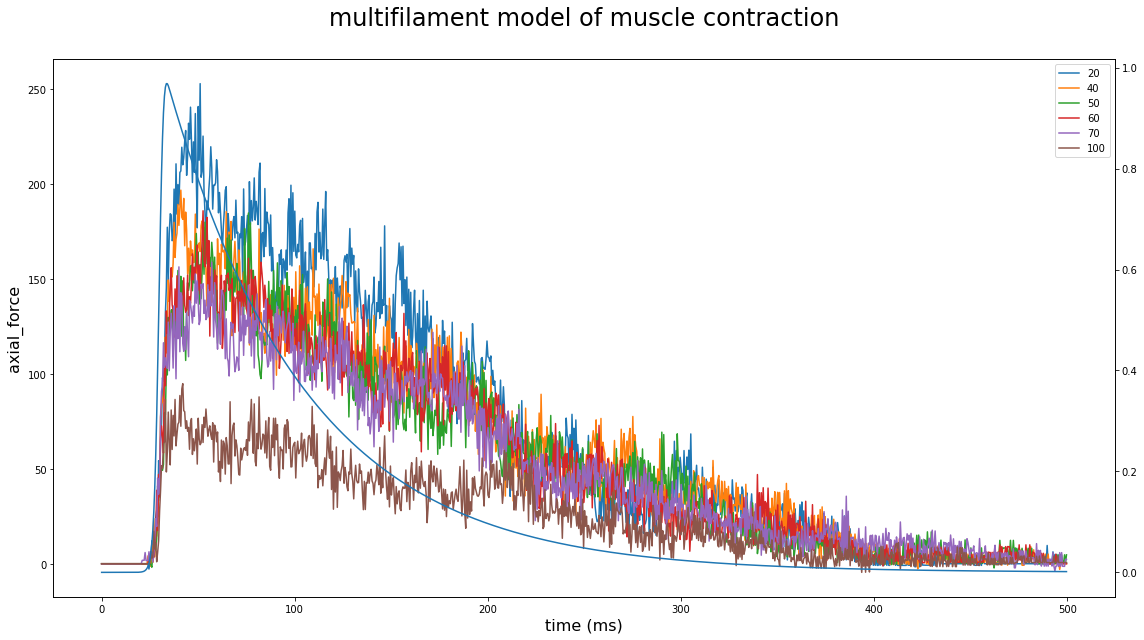

In [5]:
key = "axial_force"
fs = 16

fig, axes = plt.subplots(figsize=(16, 9))

ensemble = {}
for fname in fnames:
    try:
        with open(fname, 'r') as metafile:
            meta = json.load(metafile)
        data_fname = fname.split('.meta')[0] + '.data.json'
        with open(data_fname, 'r') as datafile:
            data = json.load(datafile)
        ensemble[float(meta['comment'])] = [meta, data]
    except FileNotFoundError:
        pass
    
for stiffness, files in sorted(ensemble.items()):   
    meta = files[0]
    data = files[1]
    
    time_trace = data['timestep'].copy()
    for i in range(len(time_trace)):
        time_trace[i] *= data['timestep_length']
    axes.plot(time_trace, data[key], label=meta['comment'])

plt.legend()

title = "multifilament model of muscle contraction\n"
plt.title(title, fontsize=fs*1.5)
plt.xlabel("time (ms)", fontsize=fs)
plt.ylabel(key, fontsize=fs)

ax2 = plt.twinx()
ax2.plot(time_trace, data['actin_permissiveness'])
    

plt.tight_layout()